In [1]:
from sco2es import PackedBed
from matplotlib import pyplot as plt
import math

# Validation

Model implementation is validated using the case parameters from the reference paper:

In [2]:
D = 3.5  # m
h_air = 5  # W/m^2 K
t_ins = 102e-3  # m
t_st = 127e-3  # m
k_g = 2.9  # W/m K

R_st = D/2 + t_ins + t_st
t_g = R_st * (math.exp(k_g / (h_air * R_st)) - 1)

packed_bed = PackedBed(
    T_initial=60 + 273,
    P=27.5e6,
    L=9.1,
    D=D,
    d=3e-3,
    eps=0.35,
    rho_s=3950,
    T_env=10 + 273,
    t_wall=[t_ins, t_st, t_g],
    k_wall=[0.25, 11.7, k_g],
    rho_wall=[250, 8050, 2650],
    cp_wall=[1190, 483.1, 732.2],
    n=1200
)

## Charging

In [3]:
t_charge = packed_bed.advance(
    T_inlet=750 + 273,
    P_inlet=27.5e6,
    m_dot_inlet=8.17,
    T_outlet_stop=725 + 273,
    dt=30,
)

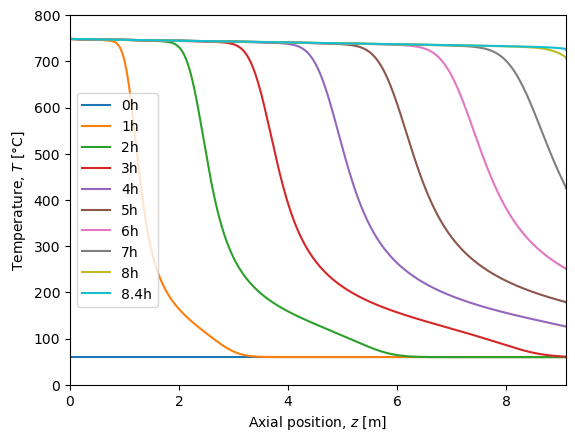

In [4]:
for i in range(int(t_charge / 3600) + 1):
    plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(h=i)] - 273, label=f"{i}h")

plt.plot(packed_bed.z, packed_bed.T_s[-1] - 273, label=f"{packed_bed.t[-1] / 3600:.1f}h")

plt.ylabel("Temperature, $T$ [°C]")
plt.xlabel("Axial position, $z$ [m]")

plt.ylim(0, 800)
plt.xlim(0, max(packed_bed.z))
plt.legend();

## Discharging

In [5]:
t_discharge = packed_bed.advance(
    T_inlet=500 + 273,
    P_inlet=27.5e6,
    m_dot_inlet=8.17,
    T_outlet_stop=650 + 273,
    dt=30,
    discharge=True,
)

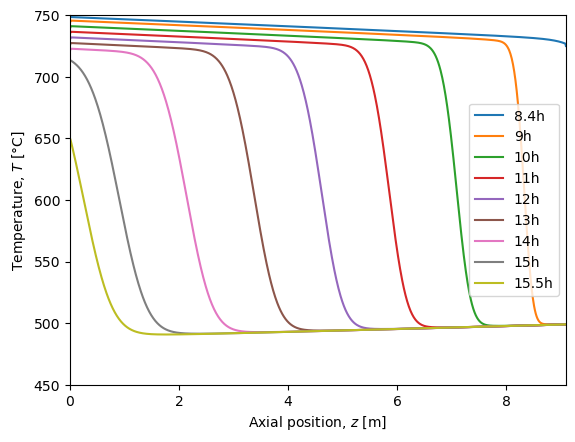

In [6]:
plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(t_charge)] - 273, label=f"{t_charge / 3600:.1f}h")

for i in range(int(t_charge / 3600) + 1, int(packed_bed.t[-1] / 3600) + 1):
    plt.plot(packed_bed.z, packed_bed.T_s[packed_bed.time_index(h=i)] - 273, label=f"{i}h")

plt.plot(packed_bed.z, packed_bed.T_s[-1] - 273, label=f"{packed_bed.t[-1] / 3600:.1f}h")

plt.ylabel("Temperature, $T$ [°C]")
plt.xlabel("Axial position, $z$ [m]")

plt.ylim(450, 750)
plt.xlim(0, max(packed_bed.z))
plt.legend();